## 決定木とは
- 決定木とは、ある簡単な基準に基づいてデータの分割を繰り返し、木のような構造を作り出すアルゴリズム。
- 分類・回帰問題の両方に適用可能。
- 「CART」と「C4.5(C5.0)」と呼ばれる2つの代表的なアルゴリズムが存在する。

### 不純度
基準となる特徴量やしきい値はどう決めるのか?

(分割前の不純度) - (分割後の不純度)

が最大になるように、分割の基準を決定する。つまり、(分割後の不純度)が最小になるような分割を行う。
「不純度」とは、簡単にいうと、どれだけいろいろなクラスの観測値が混じり合っているかを表す指標。
分類問題の場合は、1つのノードに1つのクラスの観測値のみがあるのが理想(不純度=0)。

数式で考えると

Nm個の観測値を持つ領域Rｍにおけるクラスｋの観測値の割合を次のように書く。

$$\hat{P}_mk =1/N_m\sum_{x_i\in R_i}I(y_i = k)$$

### 不純度を表す関数
- ジニ指数（微分可能）


$$1 -\sum_{k=1}^K\hat{P}_mk^2$$


- 交差エントロピー（微分可能）

$$- \sum_{k+1}^K\hat{P}mk\log\hat{P}_mk$$

### irisデータセットの場合（ジニ指数）
左:
gini = 0.168,
samples = 54,
value [0, 49, 5],
class = versicolor

右:
gini = 0.043,
samples = 46,
value = [0, 1, 45],
class = virgica


左　

$$1- \Biggl(\frac{0}{54}\Biggr)^2
- \Biggl(\frac{49}{54}\Biggr)^2
- \Biggl(\frac{49}{54}\Biggr)^2
\approx 0.168
$$

右　

$$1- \Biggl(\frac{0}{46}\Biggr)^2
- \Biggl(\frac{1}{46}\Biggr)^2
- \Biggl(\frac{45}{46}\Biggr)^2
\approx 0.043
$$

よって、全体の不純度は、

$$\frac{54}{100}\times0.168 + \frac{46}{100}\times0.043 \approx 0.111$$

### 決定木のメリットとデメリット
メリット
1. 理解が容易である(ホワイトボックス)。
1. 分類・回帰のいずれにも適用できる。
1. あらゆる問題に広く適用できる。

デメリット
1. 分散が大きい(外れ値の影響を受けやすい)。
2. 過学習しやすい(ノンパラメトリックモデル)。
3. 予測面が滑らかではない。

### 過学習を防止するためには、
- パラメータの調整が大切。
- 木の深さの上限(max-depth)や、1つのノードが最低持たなければならない観測値の数
(min_samples_leaf)などを
適切に設定する。

## 回帰問題への適用
回帰問題の場合、コスト関数を以下のように定義する。

$$\hat{c}mk =1/N_m\sum_{x_i\in R_i}y_i$$


$$Q_m(T) =1/N_m\sum_{x_i\in R_i}(y_i - \hat{c}_m)^2$$


$\hat{c}_m$はその領域に含まれる観測値の平均を表している。よって、このコスト関数は平均2乗誤差である。2つに分割したそれぞれの領域の平均2乗誤差の重み付き和が最小になるように分割を行う。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [3]:
x = moons[0]
y = moons[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
tree_clf = DecisionTreeClassifier().fit(x_train, y_train)
tree_clf_3 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

In [6]:
print(tree_clf.score(x_test, y_test))
print(tree_clf_3.score(x_test, y_test))

0.98
0.92


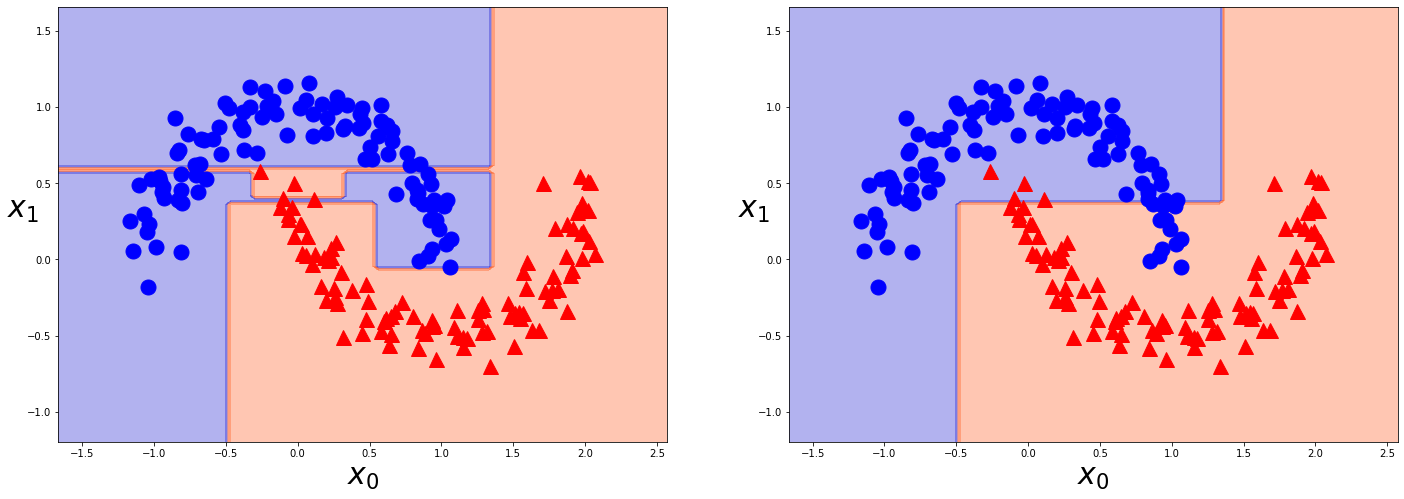

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,  x,  y):
    _x1 = np.linspace(x[:, 0].min( )-0.5,  x[:, 0].max()+0.5, 100)
    _x2 = np.linspace(x[:, 1].min( )-0.5,  x[:, 1].max()+0.5, 100)   
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel( ), x2.ravel( )]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap([ 'mediumblue', 'orangered' ])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    
def plot_dataset(x, y):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", ms=15)
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "r^", ms=15)   
    plt.xlabel("$x_0$", fontsize=30)
    plt.ylabel("$x_1$", fontsize=30, rotation=0)


    
plt.figure(figsize=(24, 8))
plt.subplot(121)
plot_decision_boundary(tree_clf, x, y)
plot_dataset(x, y)

plt.subplot(122)
plot_decision_boundary(tree_clf_3, x, y)
plot_dataset(x, y)

plt.show()

In [8]:
import mglearn
from sklearn.tree import DecisionTreeRegressor

reg_x, reg_y = mglearn.datasets.make_wave(n_samples = 100)

tree_reg = DecisionTreeRegressor().fit(reg_x, reg_y)
tree_reg_3 = DecisionTreeRegressor(max_depth=3).fit(reg_x, reg_y)

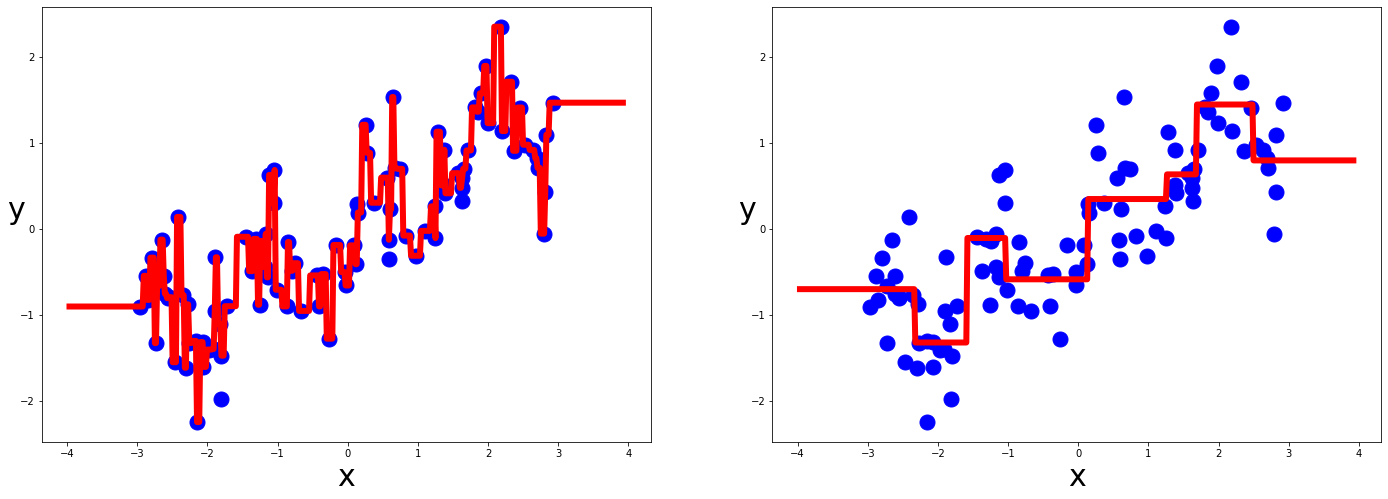

In [13]:
def plot_regression_predictions(tree_reg, x,y):
    x1 = np.linspace(x.min()-1, x.max()+1, 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.xlabel('x', fontsize=30)
    plt.ylabel('y', fontsize=30, rotation=0)   
    plt.plot(x, y, "bo", ms=15)
    plt.plot(x1, y_pred, "r-", linewidth=6)
    
plt.figure(figsize=(24, 8))
plt.subplot(121)
plot_regression_predictions(tree_reg, reg_x, reg_y)

plt.subplot(122)
plot_regression_predictions(tree_reg_3, reg_x, reg_y)

plt.show()

## 勾配ブースティング

In [15]:
import xgboost as xgb

In [ ]:
params = {
    "objective": "binary:logistic"',
    "eval_metric": "auc",
    "eta": 0.1,
    "max_depth": 6,
    "subsample": 1,
    "colsample_bytree": 1,
    "silent": 1
}

model = xgb.train(params = params,
                  dtrain = x_reg,
                  num_boost_round = 100,
                  early_stopping_rounds=10,
                  evals = [(
                  
    